In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
df = pd.read_csv('ratings_reviews.csv')

In [3]:
df

,Unnamed: 0,Reviews,Ratings
0,0,The Best Lg has to offer,5
1,1,Exceptional,5
2,2,Very solow speed and hang laptop bad,4
3,3,Its a regret!!,5
4,4,Good Product,5
...,...,...,...
10795,10795,Wonderful,5
10796,10796,Very Good,5
10797,10797,Great product,5
10798,10798,Wonderful,5


In [4]:
#drop the unnamed column
df.drop(columns=['Unnamed: 0'],inplace=True) 

In [5]:
df

,Reviews,Ratings
0,The Best Lg has to offer,5
1,Exceptional,5
2,Very solow speed and hang laptop bad,4
3,Its a regret!!,5
4,Good Product,5
...,...,...
10795,Wonderful,5
10796,Very Good,5
10797,Great product,5
10798,Wonderful,5


In [6]:
# EDA with NLP

#import required libraries for NLP
import re
# For handling string
import string
# For performing mathematical operations
import math

In [7]:
#checking for null values
df.isnull().sum()

Reviews    4
Ratings    0
dtype: int64

In [8]:
#drop null columns
df.dropna(inplace=True)
df.isnull().sum()

Reviews    0
Ratings    0
dtype: int64

In [12]:
#Lowercase the reviews
df['cleaned']=df['Reviews'].apply(lambda x: x.lower())

In [13]:
#Remove digits and words containing digits
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [14]:
#Remove Punctuations
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [15]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [16]:
df

,Reviews,Ratings,cleaned
0,The Best Lg has to offer,5,the best lg has to offer
1,Exceptional,5,exceptional
2,Very solow speed and hang laptop bad,4,very solow speed and hang laptop bad
3,Its a regret!!,5,its a regret
4,Good Product,5,good product
...,...,...,...
10795,Wonderful,5,wonderful
10796,Very Good,5,very good
10797,Great product,5,great product
10798,Wonderful,5,wonderful


In [62]:
from textblob import TextBlob

#Using TextBlob to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.
df['polarity'] = df['Reviews'].map(lambda text: TextBlob(text).sentiment.polarity)

#Create new feature for the length of the review.
df['review_len'] = df['Reviews'].astype(str).apply(len)

#Create new feature for the word count of the review.
df['word_count'] = df['Reviews'].apply(lambda x: len(str(x).split()))

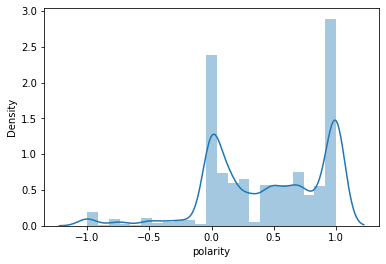

In [69]:
#The distribution of review sentiment polarity score
ax = sns.distplot(df['polarity'])

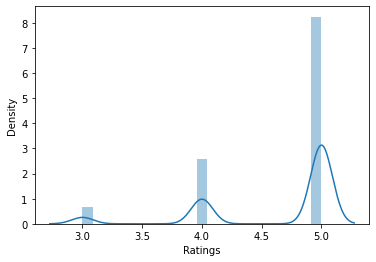

In [65]:
#The distribution of rrating
ax = sns.distplot(df['Ratings'])

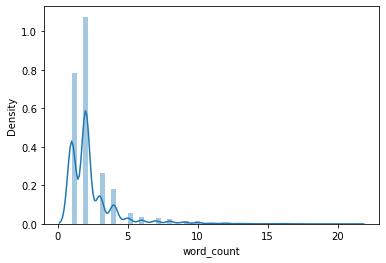

In [66]:
#The distribution of wordcount
ax = sns.distplot(df['word_count'])

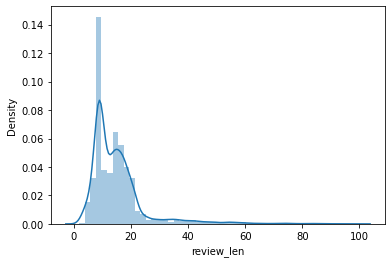

In [67]:
#The distribution of length of review
ax = sns.distplot(df['review_len'])

(array([ 629.,    0.,    0.,    0.,    0., 2422.,    0.,    0.,    0.,
        7745.]),
 array([3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 <BarContainer object of 10 artists>)

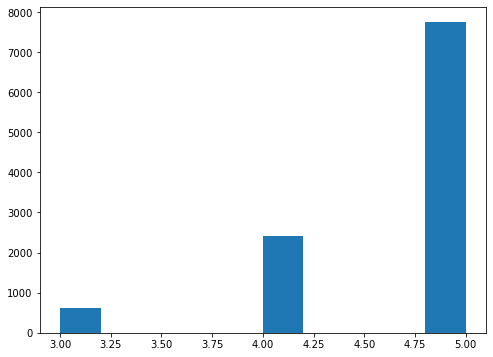

In [70]:
plt.figure(figsize=(8,6))
plt.hist(df['Ratings'])

(array([8.033e+03, 1.914e+03, 3.850e+02, 2.320e+02, 1.310e+02, 5.700e+01,
        1.900e+01, 1.700e+01, 5.000e+00, 3.000e+00]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <BarContainer object of 10 artists>)

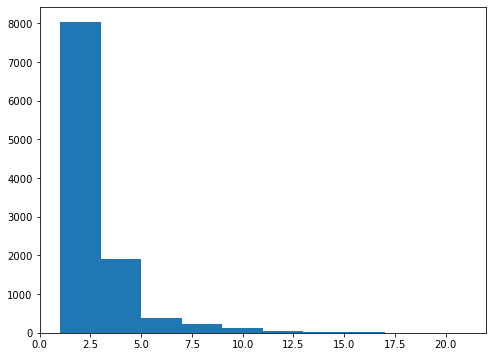

In [71]:
plt.figure(figsize=(8,6))
plt.hist(df['word_count'])

(array([4832., 4778.,  538.,  272.,  182.,  107.,   27.,   32.,   21.,
           7.]),
 array([ 2. , 11.7, 21.4, 31.1, 40.8, 50.5, 60.2, 69.9, 79.6, 89.3, 99. ]),
 <BarContainer object of 10 artists>)

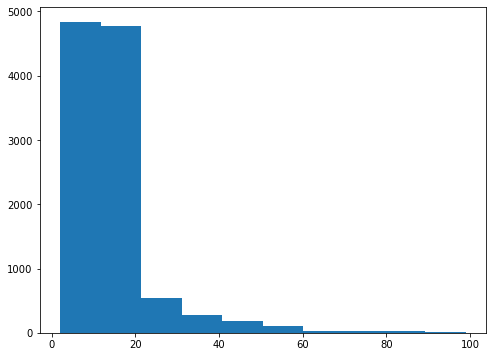

In [72]:
plt.figure(figsize=(8,6))
plt.hist(df['review_len'])

<AxesSubplot:xlabel='Ratings', ylabel='review_len'>

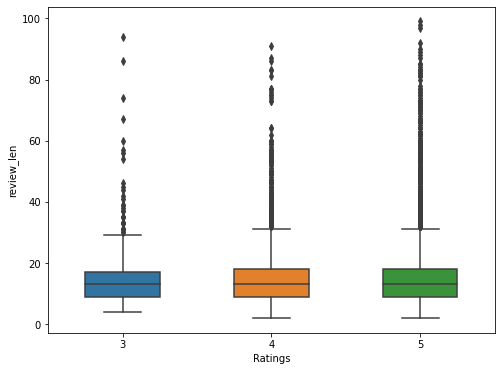

In [74]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x=df['Ratings'],y=df['review_len'],data=df,width=0.5,saturation=0.75)

In [32]:
#Preparing Text Data for Exploratory Data Analysis (EDA)

# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [36]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df.index
df_dtm.head(3)

,aad,absolute,abt,accessory,aceptable,acer,activate,ad,adapter,adequate,...,zebster,ईस,कर,करण,खर,डक,पड,पस,रस,ᴄʰᵃⁿᵍᵉᵈ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df

,Reviews,Ratings,cleaned,lemmatized
0,The Best Lg has to offer,5,the best lg has to offer,good lg offer
1,Exceptional,5,exceptional,exceptional
2,Very solow speed and hang laptop bad,4,very solow speed and hang laptop bad,solow speed hang laptop bad
3,Its a regret!!,5,its a regret,regret
4,Good Product,5,good product,good product
...,...,...,...,...
10795,Wonderful,5,wonderful,wonderful
10796,Very Good,5,very good,good
10797,Great product,5,great product,great product
10798,Wonderful,5,wonderful,wonderful


In [45]:
#Defining x an y
X = df['Reviews']
Y = df['Ratings']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

#countvectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.11      0.03      0.04       198
           4       0.24      0.03      0.06       822
           5       0.71      0.95      0.82      2543

    accuracy                           0.69      3563
   macro avg       0.35      0.34      0.31      3563
weighted avg       0.57      0.69      0.60      3563

0.690710075778838


In [49]:
#Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.09      0.01      0.02       198
           4       0.28      0.05      0.08       822
           5       0.72      0.96      0.82      2543

    accuracy                           0.70      3563
   macro avg       0.36      0.34      0.31      3563
weighted avg       0.58      0.70      0.61      3563

0.6954813359528488


In [50]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF.score(X_test,y_test)
y_pred = RF.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.17      0.01      0.01       198
           4       0.25      0.03      0.05       822
           5       0.72      0.97      0.82      2543

    accuracy                           0.70      3563
   macro avg       0.38      0.34      0.30      3563
weighted avg       0.58      0.70      0.60      3563

0.7010945832163907


In [52]:
# Decision Tree Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange(2,10),
              'criterion':['gini','entropy']
             }
GCV_DTC = GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV_DTC.fit(X_train,y_train)
GCV_DTC.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [54]:
DTC_mod = DecisionTreeClassifier(criterion='gini',max_depth=5)
DTC_mod.fit(X_train,y_train)
pred = DTC_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

71.20404153802976


In [55]:
#Creating Parameter list to pass in GridSearchCV

parameters = {'n_estimators':[100],
              'max_depth':np.arange(2,15),
              'max_features':['auto','sqrt'],
             'criterion':['gini','entropy']}

In [57]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(X_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 100}

In [58]:
RF_mod = RandomForestClassifier(criterion='entropy',max_depth=14,max_features='auto',n_estimators=100)
RF_mod.fit(X_train,y_train)
pred = RF_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

71.31630648330058


In [76]:
#Creating Parameter list to pass in MultinomialNB

parameters = {'alpha':np.arange(1,10),
              'fit_prior':[True],
              'class_prior':[None]}

In [77]:
MNB = GridSearchCV(MultinomialNB(),parameters,cv=5)
MNB.fit(X_train,y_train)
MNB.best_params_

{'alpha': 9, 'class_prior': None, 'fit_prior': True}

In [79]:
MNB_mod = MultinomialNB(alpha= 9, class_prior=None, fit_prior=True)
MNB_mod.fit(X_train,y_train)
pred = MNB_mod.predict(X_test)
print(accuracy_score(y_test,pred)*100)

70.97951164748807


RandomForestClassifier is the best model with accuracy 71%